# Setting up shop exercises
> exercises related to the *Setting up shop* section

## Exercise C.1

Modify the `draw_model(...)` function to display the input figure from any rotated perspective.

Specifically, give the `draw_model(...)` a keyword argument `glRotatefArgs` that provide a tuple of four numbers corresponding to the four arguments of `glRotatef(...)`. With this extra information, add an appropriate call to the `glRotatef(...)` function within the body of `draw_model(...)` to execute the rotation.

We know from the concept section that we can use `glTranslatef(...)` to tell OpenGL the position from which we want to see the 3D scene we're drawing.

```python
# Observe the scene from 5 units up the z axis
# (-5 means move the scene down by (0, 0, -5))
glTranslatef(0.0, 0.0, -5)
```

And we can use `glRotatef(...)` to change the angle at which we observe the scene.

```python
vector (x, y, z)
glRotatef(theta, x, y, z)
```

Let's modify `draw_model.py` by creating a `draw_model_v2.py` as suggested.


In [2]:
from teapot import load_triangles
from draw_model import draw_model

# tilt 30° on the z-axis
draw_model(load_triangles(), glRotatefArgs=(30, 0, 0, 1))

# tilt 30° on the x-axis
draw_model(load_triangles(), glRotatefArgs=(30, 1, 0, 0))

SystemExit: 0

In [7]:
from teapot import load_triangles
from draw_model import draw_model

# tilt 30° on the x-axis
draw_model(load_triangles(), glRotatefArgs=(30, 1, 0, 0))

SystemExit: 0

In [6]:
from teapot import load_triangles
from draw_model import draw_model

# tilt 30° on the y-axis
draw_model(load_triangles(), glRotatefArgs=(30, 0, 1, 0))

SystemExit: 0

## Exercise C.2

If we call `glRotatef(1, 1, 1, 1) in every frame, how many seconds does it take for the scene to complete a full revolution.

The answer depends on the number of frames per second the drawing engine is capable of displaying.

Let $ n $ be the number of frames per second:

$ 
n \hspace{1ex} fps = n \hspace{1ex} \frac{°}{sec}
$

Let $ t $ be the number of seconds needed for a full revolution:

$ 
n \cdot t \frac{°}{sec} = 360 ° \\
t = \frac{360}{n} \hspace{1ex} sec
$


Thus, if we assume 60 frames per second, we will have a full revolution in 6 seconds.

## Exercise C.3

Implement a `quadrilateral_to_triangles(...)` function that takes a set vertices that form a quadrilateral and produces a list of triangles in Python. Each triangle should be specified by 3D vectors.

The trick consists in realizing that you can form 2 triangles from a quadrilateral by properly indexing the vertices of the quadrilateral and connecting the opposite vertices, as seen below.

![Forming triangles from a quadrilateral](../images/triangles_from_quadrilateral.png)

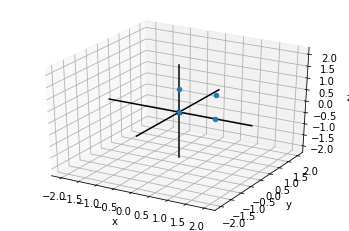

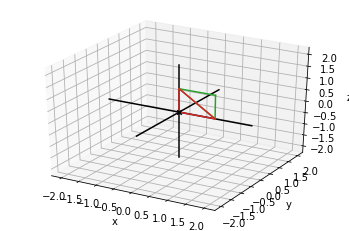

In [8]:
from draw3d import draw3d, Points3D, Segment3D, blue, red, green

def quadrilateral_to_triangles(quadrilateral_vertices):
    p0, p1, p2, p3 = quadrilateral_vertices
    return [(p0, p2, p1), (p0, p3, p2)]

# let's test it
square = [(0, 0, 1), (1, 0, 1), (1, 0, 0), (0, 0, 0)]
draw3d(
    Points3D(*square, color = blue)
)

triangle1, triangle2 = quadrilateral_to_triangles(square)
draw3d(
    Segment3D(triangle1[0], triangle1[1], color=green),
    Segment3D(triangle1[1], triangle1[2], color=green),
    Segment3D(triangle1[2], triangle1[0], color=green),

    Segment3D(triangle2[0], triangle2[1], color=red),
    Segment3D(triangle2[1], triangle2[2], color=red),
    Segment3D(triangle2[2], triangle2[0], color=red),    
    )

## Exercise C.4:

Animate the teapot by changing the arguments to `gluPerspective(...)` and `glTranslatef(...)`. This will help you visualize the effects of each of the parameters. 

We know from the concepts section that `gluPerspective(theta, aspect_ratio, z_limit_close, z_limit_far)` sets our perspective when looking at the 3D scene, with theta being the viewing angle. For example `gluPerspective(45, 1, 0.1, 50.0)` will set the angle to 45 degrees, setting the aspect ratio to 1 and ensuring that polygons closer than 0.1 or further than 50.0 units won't be displayed.

This however seems to have an effect on the size of the image being displayed rather than the angle, with smaller thetas making the shape larger, and larger thetas making the shape to appear further away.




From the concept section we know that `glTranslatef(...)` let us observe the scene from a given position.
